# Replication of George on SpuCoMNIST Dataset

In [13]:
# Import torch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

# Import tqdm
from tqdm.auto import tqdm

2.5.1
0.20.1


## 1. Load and Explore SpuCoMNIST Dataset

### Install spuco package

In [5]:
# Install spuco package
%pip install spuco --upgrade;

Note: you may need to restart the kernel to use updated packages.


### Load SpuCoMNIST Dataset

In [2]:
from spuco.datasets import SpuCoMNIST, SpuriousFeatureDifficulty
import torchvision.transforms as T

classes = [[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]]
difficulty = SpuriousFeatureDifficulty.MAGNITUDE_LARGE

train_set = SpuCoMNIST(
    root="./data",
    spurious_feature_difficulty=difficulty,
    spurious_correlation_strength=0.995,
    classes=classes,
    split="train"
)
train_set.initialize()

test_set = SpuCoMNIST(
    root="./data",
    spurious_feature_difficulty=difficulty,
    classes=classes,
    split="test"
)
test_set.initialize()

### Check Training and Testing Dataset Size

In [3]:
# Check the length of training and testing set
len(train_set), len(test_set)

(48004, 10000)

### Visualize Images

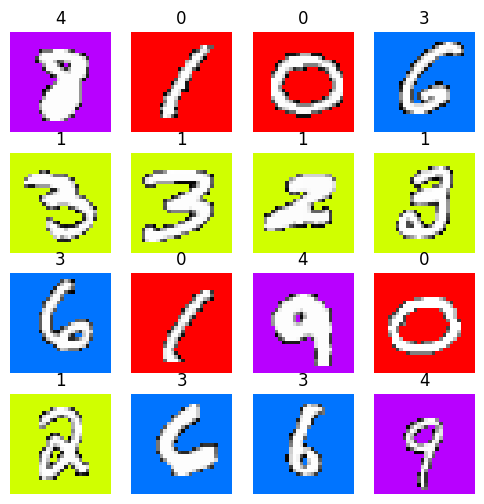

In [18]:
# Visualize MNIST data
import matplotlib.pyplot as plt

torch.manual_seed(42)

fig = plt.figure(figsize=(6, 6))
rows, cols = 4, 4

for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_set), size=[1]).item()
    img, label = train_set[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.permute(1, 2, 0))
    plt.axis('off')
    plt.title(label)